In [41]:
import pandas as pd
import numpy as np
import matplotlib as nlp
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [42]:
df = pd.DataFrame(pd.read_excel("chatgpt1.xlsx"))
tweets=df
#print(df)


# Data cleaning and preprocessing
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)

# Vectorize the text data using the Bag-of-Words technique
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Vectorize the text data using the TF-IDF technique
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [43]:
#user classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with columns: 'Text' and 'User'

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set and target variable
X = df['Text']
y = df['User']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


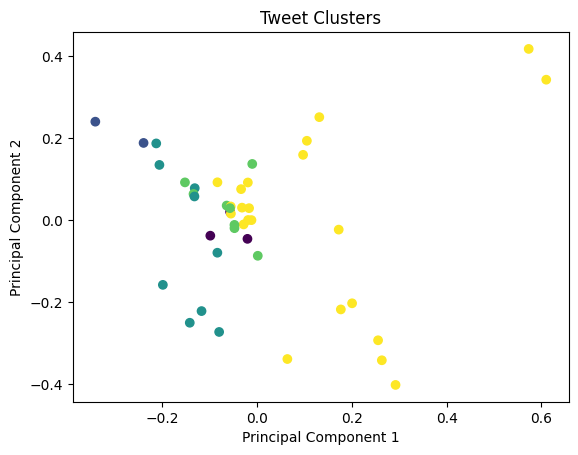

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set
features = df['Text']  # You can change this to other features like hashtags if desired

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(features)

# Apply k-means clustering
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
# Perform dimensionality reduction for visualization (e.g., using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Tweet Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


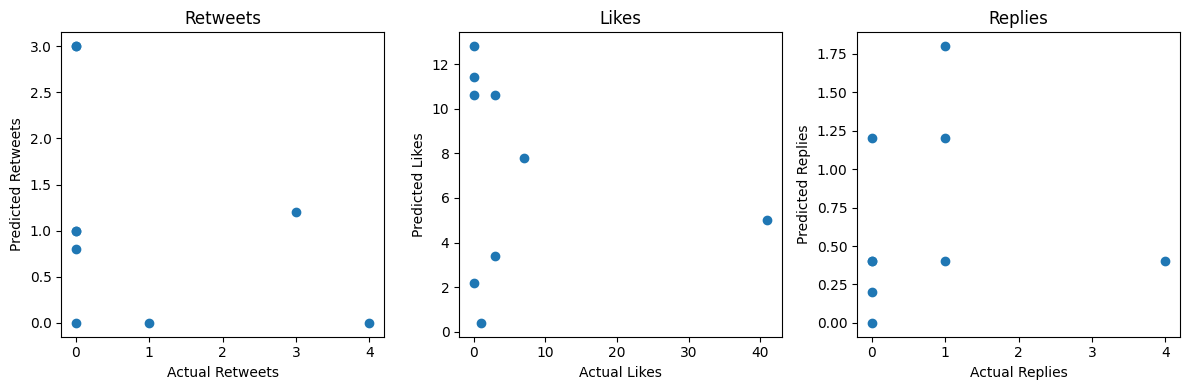

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set and target variables
X = df['Text']  # Features: text content of the tweets
y_retweets = df['RetweetCount']  # Target variable: number of retweets
y_likes = df['LikeCount']  # Target variable: number of likes
y_replies = df['ReplyCount']  # Target variable: number of replies

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train_retweets, y_test_retweets = train_test_split(X_tfidf, y_retweets, test_size=0.2, random_state=42)
_, _, y_train_likes, y_test_likes = train_test_split(X_tfidf, y_likes, test_size=0.2, random_state=42)
_, _, y_train_replies, y_test_replies = train_test_split(X_tfidf, y_replies, test_size=0.2, random_state=42)

# Train the KNN model for retweets
knn_retweets = KNeighborsRegressor(n_neighbors=5)
knn_retweets.fit(X_train, y_train_retweets)

# Predict on the testing set for retweets
y_pred_retweets = knn_retweets.predict(X_test)

# Train the KNN model for likes
knn_likes = KNeighborsRegressor(n_neighbors=5)
knn_likes.fit(X_train, y_train_likes)

# Predict on the testing set for likes
y_pred_likes = knn_likes.predict(X_test)

# Train the KNN model for replies
knn_replies = KNeighborsRegressor(n_neighbors=5)
knn_replies.fit(X_train, y_train_replies)

# Predict on the testing set for replies
y_pred_replies = knn_replies.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(12, 4))

# Plot for retweets
plt.subplot(131)
plt.scatter(y_test_retweets, y_pred_retweets)
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.title('Retweets')

# Plot for likes
plt.subplot(132)
plt.scatter(y_test_likes, y_pred_likes)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes')

# Plot for replies
plt.subplot(133)
plt.scatter(y_test_replies, y_pred_replies)
plt.xlabel('Actual Replies')
plt.ylabel('Predicted Replies')
plt.title('Replies')

plt.tight_layout()
plt.show()


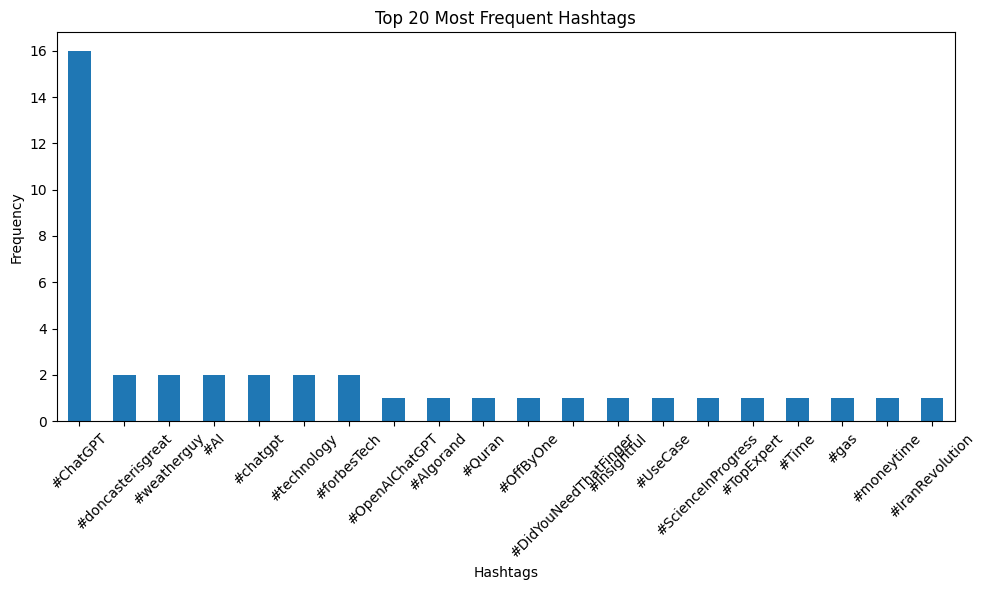

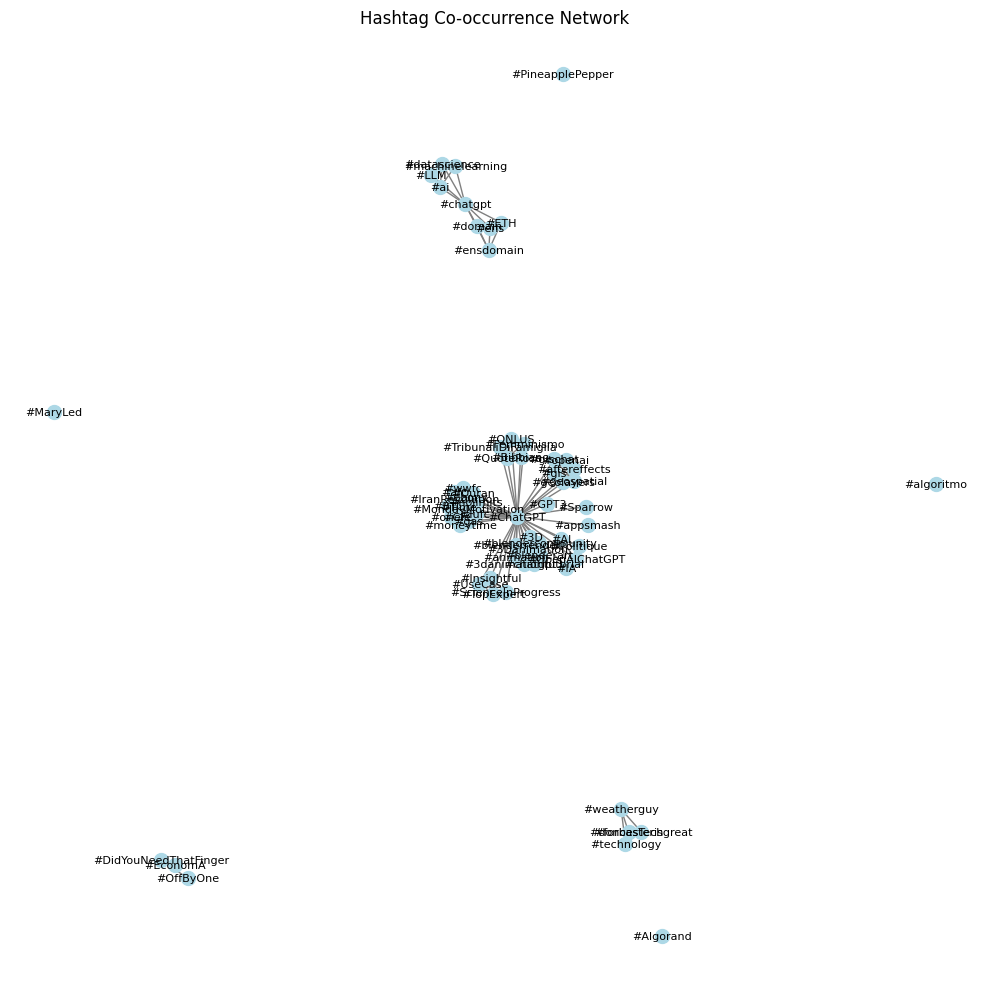

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


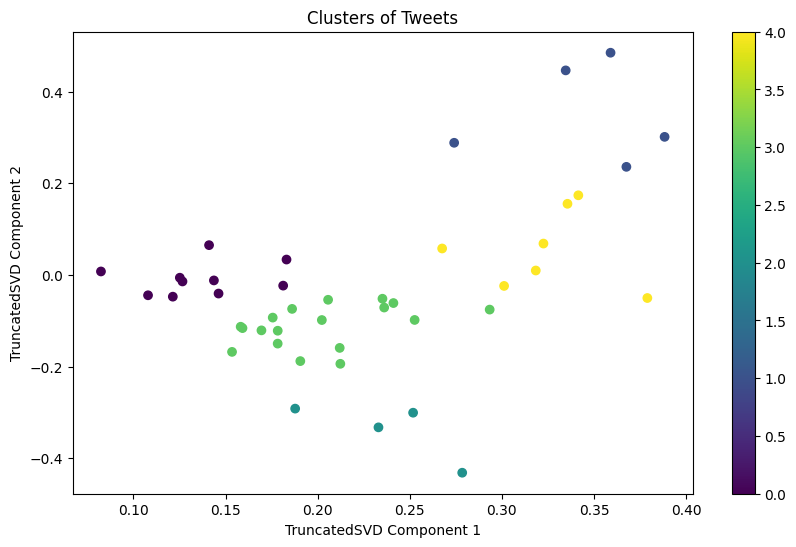

In [46]:
#hashtag analysis
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Extract hashtags from tweet text
df['Hashtags'] = df['Text'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtags_list = df['Hashtags'].sum()
hashtags_count = pd.Series(hashtags_list).value_counts()

# Plot frequency of hashtags
plt.figure(figsize=(10, 6))
hashtags_count.head(20).plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify common themes or topics
cooccurrence_matrix = pd.DataFrame(0, index=hashtags_count.index, columns=hashtags_count.index)
for hashtags in df['Hashtags']:
    for h1 in hashtags:
        for h2 in hashtags:
            if h1 != h2:
                cooccurrence_matrix.loc[h1, h2] += 1

# Plot co-occurrence matrix as a network graph
G = nx.from_pandas_adjacency(cooccurrence_matrix)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=100, edge_color='gray', font_size=8)
plt.title('Hashtag Co-occurrence Network')
plt.axis('off')
plt.tight_layout()
plt.show()

#import numpy as np
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD to reduce the dimensionality of the data
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

# Apply K-means clustering
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters of Tweets')
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()


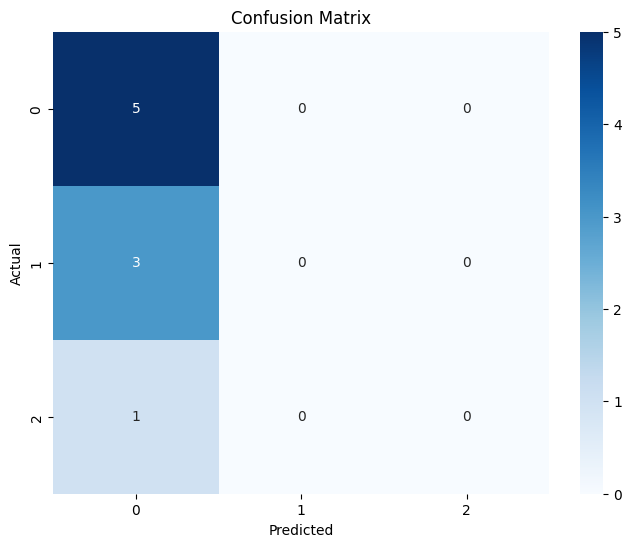

Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.19      0.33      0.24         9
weighted avg       0.31      0.56      0.40         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report



# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['ReplyCount'], test_size=0.2, random_state=42)

# Vectorize the text data using the TF-IDF technique
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_tfidf)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


In [48]:

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train_bow, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_bow)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.3333333333333333


In [49]:
# Train a Random Forest model using Bag-of-Words features
rf_model_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bow.fit(X_train_bow, y_train)

# Make predictions on the test set using Bag-of-Words features
y_pred_bow = rf_model_bow.predict(X_test_bow)

# Calculate accuracy score for Bag-of-Words model
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Accuracy (Bag-of-Words):", accuracy_bow)

# Train a Random Forest model using TF-IDF features
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF features
y_pred_tfidf = rf_model_tfidf.predict(X_test_tfidf)

# Calculate accuracy score for TF-IDF model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy (TF-IDF):", accuracy_tfidf)


Accuracy (Bag-of-Words): 0.5555555555555556
Accuracy (TF-IDF): 0.5555555555555556


In [50]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the Bag-of-Words vectorized data
knn.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_bow = knn.predict(X_test_bow)

# Calculate accuracy on the test set
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Accuracy (Bag-of-Words):", accuracy_bow)

# Train the model using the TF-IDF vectorized data
knn.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = knn.predict(X_test_tfidf)

# Calculate accuracy on the test set
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy (TF-IDF):", accuracy_tfidf)


Accuracy (Bag-of-Words): 0.5555555555555556
Accuracy (TF-IDF): 0.5555555555555556


Accuracy (Bag-of-Words): 0.4444444444444444
Accuracy (TF-IDF): 0.5555555555555556


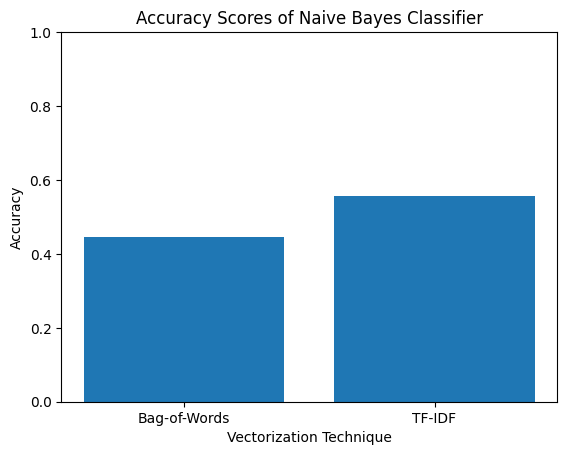

In [55]:
# Create an instance of the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier using the Bag-of-Words vectors
mnb.fit(X_train_bow, y_train)

# Make predictions on the test set using Bag-of-Words vectors
y_pred_bow = mnb.predict(X_test_bow)

# Calculate accuracy score for the predictions on the test set using Bag-of-Words vectors
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Accuracy (Bag-of-Words):", accuracy_bow)

# Train the classifier using the TF-IDF vectors
mnb.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF vectors
y_pred_tfidf = mnb.predict(X_test_tfidf)

# Calculate accuracy score for the predictions on the test set using TF-IDF vectors
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy (TF-IDF):", accuracy_tfidf)

import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_bow, accuracy_tfidf]
labels = ['Bag-of-Words', 'TF-IDF']

# Create a bar plot
plt.bar(labels, accuracy_scores)
plt.xlabel('Vectorization Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Naive Bayes Classifier')
plt.ylim(0, 1)

# Display the plot
plt.show()


Silhouette Score: 0.02582068716961494


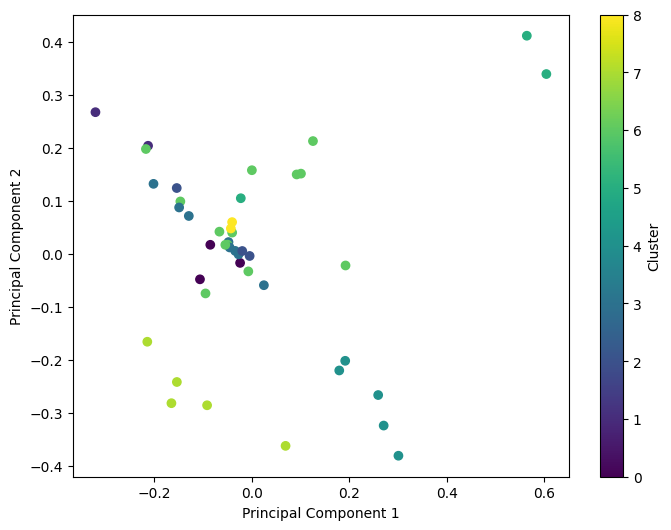

In [54]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Convert the text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Text'])

# Determine the appropriate number of clusters using silhouette score
max_clusters = 10
best_silhouette_score = -1
best_num_clusters = 0

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)
    silhouette_avg = silhouette_score(X_tfidf, labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = num_clusters

# Perform K-means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_tfidf)

# Evaluate the performance using silhouette score
silhouette_avg = silhouette_score(X_tfidf, labels)
print("Silhouette Score:", silhouette_avg)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
